In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Travel.csv')

In [25]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [26]:
df.shape

(4888, 20)

In [27]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [28]:
for i in df.columns:
    print((df[i].value_counts()))
    print('-----------------------------------------------------------------------------------------')

CustomerID
200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: count, Length: 4888, dtype: int64
-----------------------------------------------------------------------------------------
ProdTaken
0    3968
1     920
Name: count, dtype: int64
-----------------------------------------------------------------------------------------
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64
-----------------------

In [29]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [30]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [31]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [32]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [33]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [34]:
df.drop('CustomerID',axis=1,inplace=True)

In [35]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17008\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [37]:
category_cols = ['NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','TypeofContact','DurationOfPitch']

In [38]:
for i in category_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17008\3306967815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [39]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17008\4293906714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)


In [40]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [41]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [42]:
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1, inplace=True)

In [43]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [44]:
X = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

In [45]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [46]:
## Train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [47]:
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
2237,36.0,Self Enquiry,1,9.0,Salaried,Female,3.0,Deluxe,4.0,Unmarried,4.0,0,4,1,Manager,22347.0,2.0
1156,40.0,Self Enquiry,1,21.0,Salaried,Female,4.0,Standard,3.0,Married,2.0,0,1,1,Senior Manager,25435.0,4.0
3918,28.0,Self Enquiry,1,9.0,Small Business,Male,4.0,Basic,4.0,Married,2.0,0,5,1,Executive,22146.0,5.0
3497,58.0,Self Enquiry,1,7.0,Salaried,Male,2.0,Deluxe,3.0,Divorced,2.0,0,3,1,Manager,23578.0,7.0
3967,36.0,Company Invited,1,18.0,Small Business,Male,5.0,Standard,5.0,Married,4.0,1,5,1,Senior Manager,28562.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,36.0,Self Enquiry,1,13.0,Salaried,Male,3.0,Basic,4.0,Unmarried,3.0,0,1,0,Executive,17013.0,5.0
3441,28.0,Self Enquiry,1,24.0,Salaried,Female,4.0,Basic,3.0,Unmarried,3.0,1,5,1,Executive,21072.0,4.0
1344,37.0,Self Enquiry,1,9.0,Small Business,Male,3.0,Deluxe,5.0,Married,6.0,1,3,0,Manager,22347.0,3.0
4623,32.0,Company Invited,1,16.0,Small Business,Male,5.0,Basic,5.0,Unmarried,2.0,1,3,0,Executive,20999.0,5.0


In [48]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [49]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [50]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh_encoder = OneHotEncoder(drop='first')
scaler = StandardScaler()

prepocessor = ColumnTransformer(
    [
    ('OneHotEncoder', oh_encoder, cat_features),
    ('StandardScaler', scaler, num_features)
    ]
)


In [52]:
prepocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [53]:
X_train = prepocessor.fit_transform(X_train)

In [54]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.171810,-0.711953,-0.747741,-0.713603,0.530883,0.447384,-0.644305,0.678514,0.784667,-0.226963,-1.496955
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.267691,-0.711953,0.680586,0.293685,-0.727912,-0.661505,-0.644305,-1.518275,0.784667,0.369702,-0.080598
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.050810,-0.711953,-0.747741,0.293685,0.530883,-0.661505,-0.644305,1.410777,0.784667,-0.265800,0.627580
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.245442,-0.711953,-0.985796,-1.720892,-0.727912,-0.661505,-0.644305,-0.053749,0.784667,0.010892,2.043937
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.171810,-0.711953,0.323505,1.300974,1.789679,0.447384,1.552061,1.410777,0.784667,0.973903,2.043937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.171810,-0.711953,-0.271632,-0.713603,0.530883,-0.107060,-0.644305,-1.518275,-1.274426,-1.257601,0.627580
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.050810,-0.711953,1.037668,0.293685,-0.727912,-0.107060,1.552061,1.410777,0.784667,-0.473319,-0.080598
3907,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.061935,-0.711953,-0.747741,-0.713603,1.789679,1.556274,1.552061,-0.053749,-1.274426,-0.226963,-0.788777
3908,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.611310,-0.711953,0.085450,1.300974,1.789679,-0.661505,1.552061,-0.053749,-1.274426,-0.487424,0.627580


In [55]:
X_test = prepocessor.transform(X_test)

In [56]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

In [58]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    ## Make Predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    ## Training Performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)

    ## Testing Performance
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)

    print('------------------------------------------')
    print(list(models.keys())[i])
    print('------------------------------------------')
    print('Model Training Performance  : ')
    print(f"Accuracy : {train_accuracy}")
    print(f"Precision : {train_precision}")
    print(f"Recall : {train_recall}")

    print('-------------------------------------------')
    print('Model Testing Performance  : ')
    print(f"Accuracy : {test_accuracy}")
    print(f"Precision : {test_precision}")
    print(f"Recall : {test_recall}")



------------------------------------------
Logistic Regression
------------------------------------------
Model Training Performance  : 
Accuracy : 0.8462915601023018
Precision : 0.7135135135135136
Recall : 0.34782608695652173
-------------------------------------------
Model Testing Performance  : 
Accuracy : 0.8486707566462167
Precision : 0.5764705882352941
Recall : 0.30434782608695654
------------------------------------------
Decision Tree
------------------------------------------
Model Training Performance  : 
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
-------------------------------------------
Model Testing Performance  : 
Accuracy : 0.9130879345603272
Precision : 0.7111111111111111
Recall : 0.7950310559006211
------------------------------------------
Random Forest
------------------------------------------
Model Training Performance  : 
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
-------------------------------------------
Model Testing Performance  : 
Accuracy : 0.933537832

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


------------------------------------------
Adaboost
------------------------------------------
Model Training Performance  : 
Accuracy : 0.8508951406649616
Precision : 0.7095238095238096
Recall : 0.3926218708827404
-------------------------------------------
Model Testing Performance  : 
Accuracy : 0.8578732106339468
Precision : 0.6341463414634146
Recall : 0.32298136645962733
------------------------------------------
XGBoost
------------------------------------------
Model Training Performance  : 
Accuracy : 0.9997442455242966
Precision : 1.0
Recall : 0.9986824769433466
-------------------------------------------
Model Testing Performance  : 
Accuracy : 0.9458077709611452
Precision : 0.9285714285714286
Recall : 0.7267080745341615


In [67]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {
    "n_estimators": [100, 200, 300],
    'max_depth':[5,8,10,13,20],
    'learning_rate':[0.1,0.01],
    'colsample_bytree':[0.5,0.8,0.4,0.3,1.0]

}

In [68]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [69]:
xgboost_params

{'n_estimators': [100, 200, 300],
 'max_depth': [5, 8, 10, 13, 20],
 'learning_rate': [0.1, 0.01],
 'colsample_bytree': [0.5, 0.8, 0.4, 0.3, 1.0]}

In [70]:
## List for Hyper Parameter tuning
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ("XGBOOST", XGBClassifier(), xgboost_params),
                   ]

In [71]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=20,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\s

Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
---------------- Best Params for XGBOOST -------------------
{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [72]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),

    "XGBOOST": XGBClassifier(n_estimators= 100,max_depth=20,learning_rate= 0.1, colsample_bytree= 1.0)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9427
- F1 score: 0.9394
- Precision: 0.9339
- Recall: 0.7019
- Roc Auc Score: 0.8460


XGBOOST
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9560
- F1 score: 0.9548
- Precision: 0.9214
- Recall: 0.8012
- Roc Auc Score: 0.8939




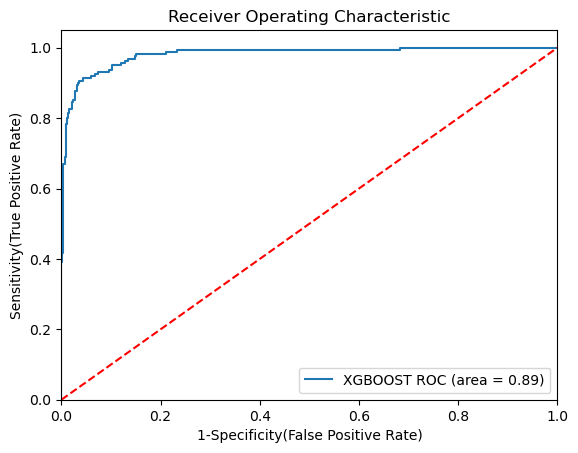

In [73]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'XGBOOST',
    'model': XGBClassifier(n_estimators= 100,max_depth=20,learning_rate= 0.1, colsample_bytree= 1.0),
    'auc':  0.8939
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 